# Summary of Inter GPU Point-to-Point Communication within a Node

In [1]:
%matplotlib inline
import glob
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

SAVE_FIGURE = False
FIGURE_FONT_SIZE = 12

plt.rcParams["figure.dpi"] = 120
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = FIGURE_FONT_SIZE
pd.set_option('precision', 3)
pd.set_option('display.max_columns', 20)

project_dir = os.getcwd()
dir_anode_results = f'{project_dir}/intra_anode'
dir_vnode_results = f'{project_dir}/intra_vnode'
bandwidth_title = r'Bidirectional P2P=Enabled Bandwidth Matrix'
latency_title = r'P2P=Enabled Latency \(P2P Writes\) Matrix'

In [2]:
# function definitions

def read_table(filepath, title, nlines):
    pattern = title
    in_data = False
    lines = []
    with open(filepath) as inf:
        for line in inf:
            if len(lines) == nlines:
                break
            line = line.strip()
            if not in_data:
                if re.match(pattern, line):
                    in_data = True
                    continue
            else:
                lines.append(line)

    column_line = lines[0]
    value_lines = lines[1:]
    columns = column_line.split()[1:]
    index = [line.split()[0] for line in value_lines]
    values = [map(float, line.split()[1:]) for line in value_lines]
    return pd.DataFrame(data=values, index=index, columns=columns)

def plot_heatmap(data, title, cbar_label, fmt=None):
    if fmt == None:
        fmt = '.0f'
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.heatmap(data, ax=ax, square=True, cmap='Blues', annot=True, fmt=fmt,
                annot_kws={'fontsize':8}, cbar_kws={'label': cbar_label})
    if SAVE_FIGURE:
        ax.set_title(None)
        fig.savefig(f'{title}.pdf')
    ax.set_title(title)

def plot_bandwidth(data, title):
    plot_heatmap(data, title, 'GB/s')

def plot_latency(data, title):
    plot_heatmap(data, title, 'Micro-second', fmt='.2f')

In [3]:
files_anode = glob.glob(f'{dir_anode_results}/job.sh.o*')
files_vnode = glob.glob(f'{dir_vnode_results}/job.sh.o*')

## Single result

### Bandwidth

In [4]:
bw_anode = read_table(files_anode[0], bandwidth_title, 9)
bw_vnode = read_table(files_vnode[0], bandwidth_title, 5)

In [5]:
print(f'{bandwidth_title} (GB/s) - ComputeNode(A)')
bw_anode

Bidirectional P2P=Enabled Bandwidth Matrix (GB/s) - ComputeNode(A)


,0,1,2,3,4,5,6,7
0,1291.32,411.36,411.97,411.25,413.20,414.27,413.42,413.97
1,411.91,1290.26,411.69,410.93,413.63,412.76,412.00,412.98
2,410.93,410.93,1293.46,411.14,411.35,412.65,412.33,411.79
3,411.69,410.82,410.28,1291.32,411.99,413.63,411.68,412.00
4,414.92,414.36,414.41,413.72,1311.92,519.75,520.12,519.74
5,415.56,414.09,414.55,413.69,516.13,1302.63,518.80,519.22
6,415.26,413.01,413.84,413.95,517.51,516.99,1304.26,519.92
7,415.78,415.80,414.36,414.59,518.53,520.09,519.57,1306.98


In [6]:
print(f'{bandwidth_title} (GB/s) - ComputeNode(V)')
bw_vnode

Bidirectional P2P=Enabled Bandwidth Matrix (GB/s) - ComputeNode(V)


,0,1,2,3
0,781.05,96.84,96.89,96.90
1,96.85,779.30,96.91,96.90
2,96.90,96.86,779.30,96.90
3,96.91,96.86,96.85,779.89


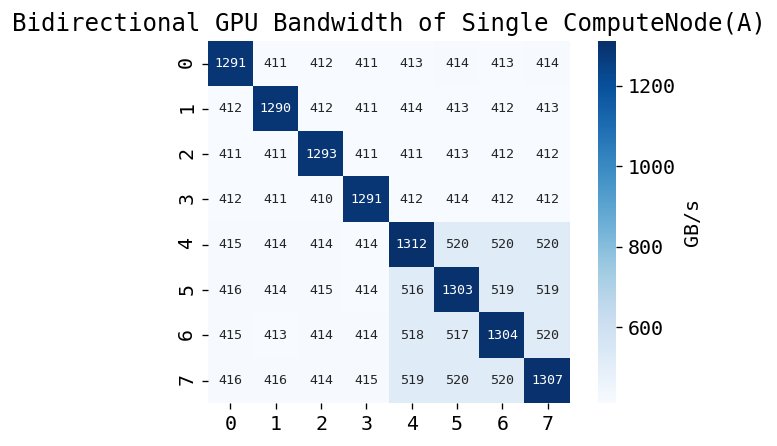

In [7]:
plot_bandwidth(bw_anode, 'Bidirectional GPU Bandwidth of Single ComputeNode(A)')

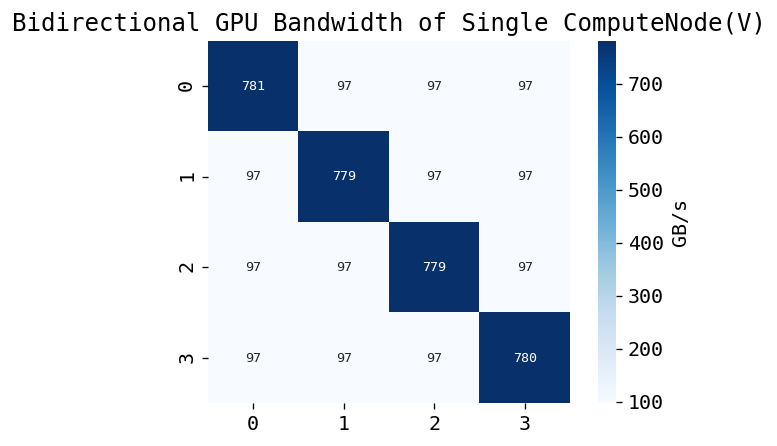

In [8]:
plot_bandwidth(bw_vnode, 'Bidirectional GPU Bandwidth of Single ComputeNode(V)')

### Latency

In [9]:
lat_anode = read_table(files_anode[0], latency_title, 9)
lat_vnode = read_table(files_vnode[0], latency_title, 5)

In [10]:
print(f'{latency_title} (us) - ComputeNode(A)')
lat_anode

P2P=Enabled Latency \(P2P Writes\) Matrix (us) - ComputeNode(A)


,0,1,2,3,4,5,6,7
0,3.15,3.37,3.35,3.41,3.34,3.35,3.34,3.40
1,3.42,3.16,3.32,3.33,3.31,3.33,3.40,3.33
2,3.42,3.38,2.94,3.42,3.41,3.40,3.36,3.35
3,3.33,3.34,3.33,3.15,3.40,3.34,3.40,3.33
4,2.82,2.75,2.75,2.74,2.31,2.81,2.76,2.80
5,2.81,2.76,2.81,2.76,2.81,2.40,2.81,2.81
6,2.75,2.82,2.76,2.77,2.75,2.82,2.44,2.77
7,2.76,2.75,2.75,2.75,2.81,2.82,2.75,2.29


In [11]:
print(f'{latency_title} (us) - ComputeNode(V)')
lat_vnode

P2P=Enabled Latency \(P2P Writes\) Matrix (us) - ComputeNode(V)


,0,1,2,3
0,1.76,1.85,1.89,1.86
1,1.85,1.63,1.87,1.85
2,1.92,1.92,1.66,1.91
3,1.99,1.96,1.97,1.68


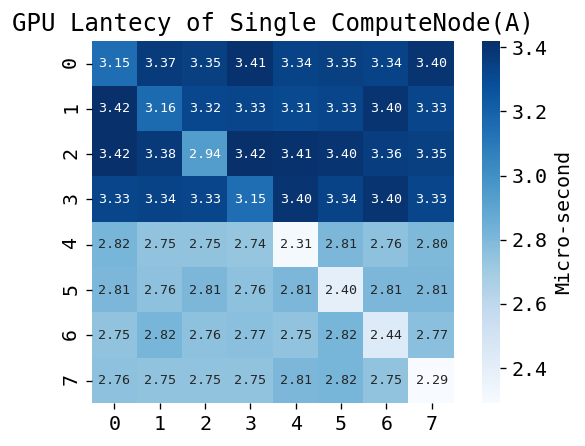

In [12]:
plot_latency(lat_anode, 'GPU Lantecy of Single ComputeNode(A)')

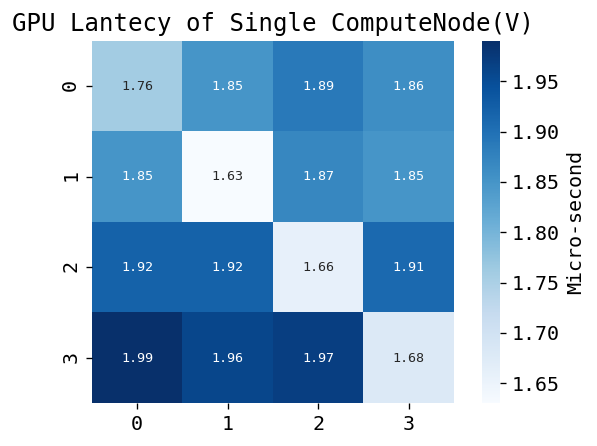

In [13]:
plot_latency(lat_vnode, 'GPU Lantecy of Single ComputeNode(V)')

## Average

### Bandwidth

In [14]:
bw_anode_dfs = [read_table(file, bandwidth_title, 9) for file in files_anode]
bw_anode = sum(bw_anode_dfs) / len(bw_anode_dfs)
bw_vnode_dfs = [read_table(file, bandwidth_title, 5) for file in files_vnode]
bw_vnode = sum(bw_vnode_dfs) / len(bw_vnode_dfs)

In [15]:
print(f'{bandwidth_title} (GB/s) - ComputeNode(A)')
bw_anode

Bidirectional P2P=Enabled Bandwidth Matrix (GB/s) - ComputeNode(A)


,0,1,2,3,4,5,6,7
0,1292.713,409.982,410.960,411.058,412.574,412.955,412.794,412.797
1,410.690,1293.627,411.750,411.062,412.731,412.615,412.409,412.469
2,411.418,412.199,1293.249,412.306,414.849,414.729,414.476,414.529
3,410.390,411.462,411.288,1292.338,412.918,413.232,412.243,412.944
4,414.800,414.247,416.146,414.477,1305.942,488.327,487.219,488.369
5,414.709,414.669,416.885,414.776,487.318,1306.936,518.983,518.475
6,415.431,414.208,416.724,414.787,487.479,518.348,1303.932,519.183
7,415.062,414.735,416.693,414.905,469.434,519.155,518.528,1304.207


In [16]:
print(f'{bandwidth_title} (GB/s) - ComputeNode(V)')
bw_vnode

Bidirectional P2P=Enabled Bandwidth Matrix (GB/s) - ComputeNode(V)


,0,1,2,3
0,779.888,96.893,96.892,96.891
1,96.865,780.139,96.909,96.903
2,96.908,96.867,779.285,96.885
3,96.907,96.896,96.885,779.330


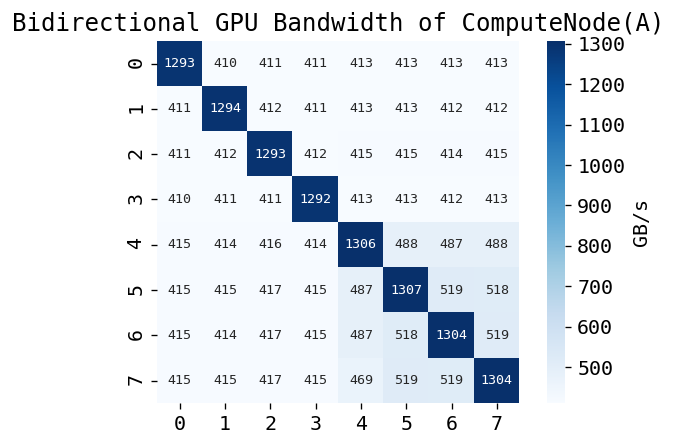

In [17]:
plot_bandwidth(bw_anode, 'Bidirectional GPU Bandwidth of ComputeNode(A)')

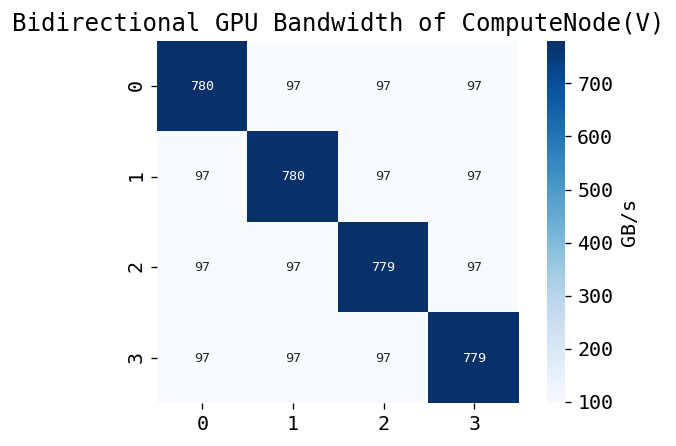

In [18]:
plot_bandwidth(bw_vnode, 'Bidirectional GPU Bandwidth of ComputeNode(V)')

### Latency

In [19]:
lat_anode_dfs = [read_table(file, latency_title, 9) for file in files_anode]
lat_anode = sum(lat_anode_dfs) / len(lat_anode_dfs)
lat_vnode_dfs = [read_table(file, latency_title, 5) for file in files_vnode]
lat_vnode = sum(lat_vnode_dfs) / len(lat_vnode_dfs)

In [20]:
print(f'{latency_title} (us) - ComputeNode(A)')
lat_anode

P2P=Enabled Latency \(P2P Writes\) Matrix (us) - ComputeNode(A)


,0,1,2,3,4,5,6,7
0,3.099,3.387,3.344,3.359,3.346,3.345,3.339,3.341
1,3.406,3.082,3.370,3.339,3.341,3.363,3.346,3.341
2,3.371,3.342,3.075,3.348,3.369,3.355,3.366,3.366
3,3.348,3.350,3.358,3.099,3.355,3.365,3.351,3.337
4,3.156,3.127,3.111,3.183,2.918,3.174,3.181,3.210
5,2.774,2.772,2.767,2.768,2.779,2.372,2.830,2.768
6,2.780,2.770,2.778,2.772,2.794,2.833,2.414,2.761
7,2.777,2.762,2.779,2.774,2.841,2.776,2.763,2.363


In [21]:
print(f'{latency_title} (us) - ComputeNode(V)')
lat_vnode

P2P=Enabled Latency \(P2P Writes\) Matrix (us) - ComputeNode(V)


,0,1,2,3
0,1.787,1.873,1.877,1.872
1,1.862,1.712,1.858,1.858
2,1.950,1.938,1.673,1.940
3,1.971,1.970,1.975,1.666


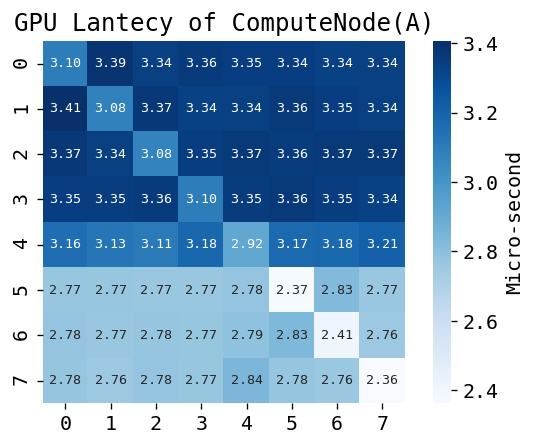

In [22]:
plot_latency(lat_anode, 'GPU Lantecy of ComputeNode(A)')

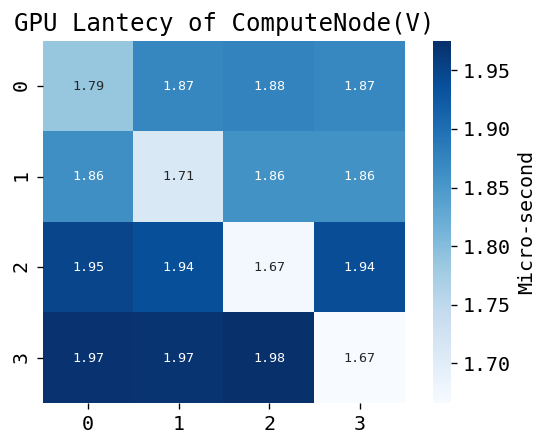

In [23]:
plot_latency(lat_vnode, 'GPU Lantecy of ComputeNode(V)')